# COMP 135 Fall 2019: HW1 STARTER

# Setup comp135_env package imports

In [1]:
import os
import numpy as np
import sklearn.neighbors
import sklearn.tree

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

# Setup student-defined imports

In [3]:
from LeastSquaresLinearRegression import LeastSquaresLinearRegressor

In [4]:
from evaluate_perf_metrics import (
    calc_perf_metric__absolute_error, calc_perf_metric__squared_error,
    calc_perf_metrics_for_regressor_on_dataset)

# Load dataset

In [5]:
## TODO load all data (train/valid/test) into x_tr_NF, x_va_NF, x_te_NF, ...

In [6]:
y_tr_N = np.loadtxt('data_abalone/y_train.csv', delimiter=',', skiprows=1)

In [7]:
x_tr_NF = np.loadtxt('data_abalone/x_train.csv', delimiter=',', skiprows=1)

# 1a : Abalone histograms of response variable 'rings'

#### 1a(i): Produce one figure with three subplots, showing histograms of $y$ from train/valid/test

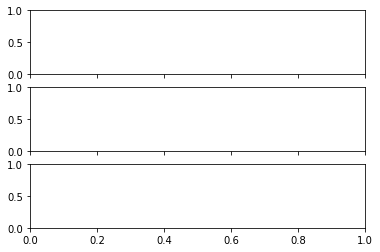

In [8]:
fig_h, axes_arr = plt.subplots(nrows=3, ncols=1, sharex=True)

## TODO plot histograms on the axes
## e.g. sns.distplot(y_tr_N, kde=False, rug=True, ax=axes_arr[0]);


#### 1a(ii): Describe the **train** distribution. Unimodal or multimodal? What shape? Are there noticeable outliers?

**TODO ANSWER HERE**

#### 1a(iii): Quantify train's descriptive statistics. 

In [9]:
### TODO CODE HERE

# 1b : Scatterplots of 'rings' vs 'diam' and 'rings' vs 'shucked'

#### **1b(i):** Create figure with two subplots: scatter plot of `diam_mm` vs `rings` and scatter of `shucked_weight_g` vs `rings`.

In [10]:
## TODO CODE HERE

#### **1b(ii):** Describe the trends you between diameter and rings in a few sentences.

**TODO ANSWER HERE**

#### 1b(iii): Describe the trends you see between shucked weight and rings.


**TODO ANSWER HERE**

# Setup code for 1c

In [11]:
## Dummy class to perform "always guess training mean" prediction
class MeanPredictor():
    def __init__(self):
        self.yhat = None
    
    def fit(self, x_tr_NF, y_tr_N):
        self.yhat = np.mean(y_tr_N)
    
    def predict(self, x_NF):
        return self.yhat

In [12]:
## Dummy class to perform "always guess training median" prediction
class MedianPredictor():
    def __init__(self):
        self.yhat = None
    
    def fit(self, x_tr_NF, y_tr_N):
        self.yhat = np.median(y_tr_N)
    
    def predict(self, x_NF):
        return self.yhat

In [13]:
mean_value_predictor = MeanPredictor()
## TODO fit the predictor, like mean_value_predictor.fit(x_tr_N2, y_tr_N)

## TODO evaluate predictions on train, valid, and test

In [14]:
median_value_predictor = MedianPredictor()
## TODO fit the predictor
## TODO evaluate predictions on train, valid, and test

# 1c : Results Table for Abalone MSE

#### **1c:** Make a table of the **mean-squared-error** for each of the MeanPredictor and MedianPredictor predictors when evaluated on all 3 dataset splits (training, validation, and test).


**Mean Squared Error:**

| split |  guess-mean | guess-median |
| ----- | ----------- | ------------ |
| train |        |         |        
| valid |        |         |
| test  |        |         |


# Model fitting code for 1d

In [15]:
linear_regressor_2feats = LeastSquaresLinearRegressor()
# TODO fit and evaluate

In [16]:
linear_regressor_8feats = LeastSquaresLinearRegressor()
# TODO fit and evaluate

# 1d : Results Table for Mean Squared Error on Abalone


**Mean Squared Error:**

| split |  guess mean | guess median | linear regr (2 feats) | linear regr (8 feats)
| ----- | ----------- | ------------ | --------------------- | ---------------------
| train |       
| valid |
| test  |

#### **1d(iii):** Does using more features seem worthwhile? Do you think the improvement on the test data is significant? Why or why not?


# 1e: Linear Regression Coef Interpretation

#### 1e(i): Show the learned coefficients for the "2 features" dataset.

In [17]:
# TODO linear_regressor_2feats.print_weights_in_sorted_order(...)

#### 1e(ii): Show the learned coefficients for the "8 features" dataset.

In [18]:
# TODO linear_regressor_8feats.print_weights_in_sorted_order(...)

#### 1e(iii): Do the values (signs, magnitudes) of the coefficients for diameter and shucked weight make sense, esp. given the scatter plots in 1b?

**TODO  ANSWER HERE**

# 1e : Model selection for K-Nearest Neighbor Regressor

In [19]:
param_name = 'n_neighbors'
param_list = [1, 3, 5, 7, 11, 21, 41, 61, 81, 101, 201, 401, 801] # TODO ADD N
# Keep only values below total training size
param_list = [p for p in param_list if p <= param_list[-1]]

In [20]:
train_mse_list = []
valid_mse_list = []
test_mse_list = []
for n_neighbors in param_list:
    knn_regr = sklearn.neighbors.KNeighborsRegressor(
        n_neighbors=n_neighbors,
        metric='euclidean',
        algorithm='brute')
    # TODO fit and predict and track perf values in the lists

#### **1e(i):** Make a line plot for mean-squared-error (MSE) vs $K$ on the validation set

In [21]:
# TODO

#### **1e(i):** Make a ZOOMED IN line plot for mean-squared-error (MSE) vs $K$ on the validation set

In [22]:
# TODO code here

#### **1e(ii):** Which value do you recommend?

In [23]:
# TODO

#### **1e(iii):** Cumulative results table with K-Nearest Neighbor

**Mean Squared Error:**

| split |  guess mean | guess median | linear regr (2 feats) | linear regr (8 feats) | k-NN (8 feats)  |
| ----- | ----------- | ------------ | --------------------- | --------------------- | ----- |
| train |   
| valid | 
| test  |

# <a name="problem-1-g"> 1g: Analyzing Residuals

In [24]:
# TODO compute the predicted y values for linear regr and kNN

#### **1f(i):** Plot scatters of y vs yhat for linear regression and the best k-NN regressor


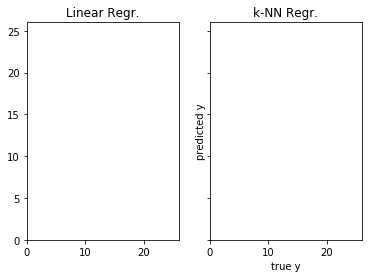

In [25]:
fig_h, ax_grid = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
plt.xlim([0, 26]); plt.ylim([0, 26]);

# ax_grid[0].plot(y_va_N, linear_yhat_va_N, 'k.', alpha=0.2);
ax_grid[0].set_title('Linear Regr.'); plt.xlabel('true y'); plt.ylabel('predicted y');

# ax_grid[1].plot(y_va_N, knn_yhat_va_N, 'k.', alpha=0.2);
plt.title('k-NN Regr.'); plt.xlabel('true y'); plt.ylabel('predicted y');

#### **1f(ii):** What kinds of systematic errors does each method make? What should be done about these?


TODO ANSWER HERE

# Problem 2 : Analysis of Doctor Visits

In [26]:
# TODO load data here

# 2a: Histogram of Number of Doctor Visits per year

**2a(i):** Produce one figure with three subplots, showing histograms of the $y$ values on training, validation, and test sets.

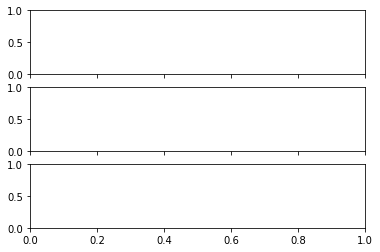

In [27]:
fig_h, axes_arr = plt.subplots(nrows=3, ncols=1, sharex=True)

## TODO plot histograms on the axes
## e.g. sns.distplot(y_tr_N, kde=False, rug=True, ax=axes_arr[0]);

#### **2a(ii):** Describe the **training** distribution: unimodal or multimodal? What shape?

TODO ANSWER HERE

#### **2a(iii):** Training statistics: What is the mean? The median? Minimum value? Maximum value? Most common value?


In [28]:
# TODO

# 2b : Scatter plots looking at number of visits vs age and number of conditions

#### **2b(i):** Scatter plots

In [29]:
# TODO PLOTTING CODE HERE

# 2c : Baseline predictions

#### **2c(i):** Given stakeholder's preferences, which error metric is most appropriate and why?

Because errors should scale linearly, we should use the *mean absolute error* metric.

If we used mean squared error, an error of 2 would cost 4x an error of 1.

In [30]:
mean_value_predictor = MeanPredictor()
## TODO fit and predict...

In [31]:
median_value_predictor = MedianPredictor()
## TODO fit and predict...

#### 2c(ii) : Results Table for Doctor Visits with Mean Absolute Error

**Mean Absolute Error:**

| split |  guess-mean | guess-median |
| ----- | ----------- | ------------ |
| train |      
| valid |  
| test  | 

# Setup code for 2d

In [32]:
linear_regressor_2feats = LeastSquaresLinearRegressor()
# TODO fit and predict

In [33]:
linear_regressor_10feats = LeastSquaresLinearRegressor()
# TODO fit and predict

** 2d(i) and 2d(ii):** Add LR to Results Table for MAE on DoctorVisits

**Mean Absolute Error:**

| split |  guess-mean | guess-median | linear regr (2 feats) | linear regr (10 feats) |
| ----- | ----------- | ------------ | --------------------- | ---------------------- |
| train |    
| valid |    
| test  |    

# 2e : DecisionTreeRegressor 

In [34]:
param_name = 'min_samples_leaf'
param_list = [1, 2, 3, 4, 5, 10, 20, 50, 100, 200, 500, 1000] # TODO add size of training set

In [35]:
train_mae_list = []
valid_mae_list = []
test_mae_list = []
for param in param_list:
    tree_regr = sklearn.tree.DecisionTreeRegressor(
        min_samples_leaf=param,
        random_state=42)
    # Fit, predict, and track perf metrics...

#### 2e(i): Line plot of mean absolute error vs min_samples_leaf

In [36]:
# TODO plot results

#### **2e(ii):** Which value of min_samples_leaf would you recommend?


TODO

#### 2e(iii): Add a column to the results table for MAE on DoctorVisits

**Mean Absolute Error:**


| split |  guess-mean | guess-median | linear regr (2 feats) | linear regr (10 feats) | decision tree
| ----- | ----------- | ------------ | --------------------- | ---------------------- | --- |
| train |    
| valid |    
| test  |    

# 2f : DecisionTreeRegressor with MAE Training Criterion

In [37]:
train_mae_list = []
valid_mae_list = []
test_mae_list = []
for param in param_list:
    tree_regr = sklearn.tree.DecisionTreeRegressor(
        criterion='mae', # USE MEAN ABSOLUTE ERROR here
        min_samples_leaf=param,
        random_state=42)
    # TODO fit, predict, and track perf metrics

#### 2f(i): Line plot of mean absolute error vs min_samples_leaf

In [38]:
# TODO

#### 2f(ii): Which value would you recommend?

In [39]:
# TODO

#### Setup for 2f(iii)

#### 2f(iii): Add a column to the results table for MAE on DoctorVisits


**Mean Absolute Error:**


| split |  guess-mean | guess-median | linear regr (2 feats) | linear regr (10 feats) | decision tree (MSE) | decision tree (MAE)
| ----- | ----------- | ------------ | --------------------- | ---------------------- | --- | --- |
| train |    
| valid |    
| test  |    

# Problem 3: Concept questions

# 3a: Limits of $K$-NN

**Question**: When $K$ equals the total training set size $N$, the $K$-nearest-neighbor regression algorithm approaches the behavior of which other regression method discussed here?

#### 3a Answer:

TODO

# 3b: Modifications of $K$-NN

**Question**: Suppose in problem 2, when trying to minimize *mean absolute error* on heldout data, that instead of a DecisionTreeRegressor, we had used a $K$-NN regressor with Euclidean distance (as in Problem 1f).  

Would we expect $K$-NN with large $K$ to always beat the strongest constant-prediction baseline (e.g. guess-median or guess-mean)?

To get better MAE values using a nearest-neighbor like approach, should we change the distance function used to compute neighbors? Would we need to change some other step of the $K$-NN prediction process?


#### 3b Answer:

TODO

# 3c: Linear Regression with Categorical Features

**Question:** Your colleague trains a linear regression model on a subset of the DoctorVisits data using only the `has_medicaid` and `has_private_insurance` features. Thus, all features in the vector have a binary categorical type and can be represented via a redundant one-hot encoding. 

To your dismay, you discover that your colleague failed to include a bias term (aka intercept term) when training the weights. You recall from class that including a bias term can be important.

To be concrete, you wish each example $x_i$ was represented as a (bias-included) vector:
$$
x_i = [
    \texttt{has_medicaid}
    \quad \texttt{has_private_insurance}
    \quad 1
] \quad \quad \quad ~
$$

However, your colleague used the following representation:
$$
\tilde{x}_i = [
    \texttt{has_medicaid}
    \quad \texttt{not(has_medicaid)}
    \quad \texttt{has_private_insurance}
    \quad \texttt{not(has_private_insurance)} 
]
$$

Your colleague has delivered to you a length-4 feature vector $\tilde{w}$ for the 4 features above, but then left for vacation without giving you access to the training data.

Can you manipulate the $\tilde{w}$ vector to estimate an appropriate $w$ and $b$ such that for all possible inputs $x_i$:

$$
    w^T x_i + b = \tilde{w}^T \tilde{x}_i
$$

#### 3c Answer:

TODO